## 全局向量词嵌入GloVe
上下⽂窗⼝内的词共现可以携带丰富的语义信息。例如，在⼀个⼤型语料库中，“固体”⽐“⽓体”更有可能
与“冰”共现，但“⽓体”⼀词与“蒸汽”的共现频率可能⽐与“冰”的共现频率更⾼。此外，可以预先计算
此类共现的全局语料库统计数据：这可以提⾼训练效率。为了利⽤整个语料库中的统计信息进⾏词嵌⼊，让
我们⾸先回顾 14.1.3节中的跳元模型，但是使⽤全局语料库统计（如共现计数）来解释它。

### 带全局语料统计的跳元模型
⽤qij表⽰词wj的条件概率P(wj | wi)，在跳元模型中给定词wi，我们有：

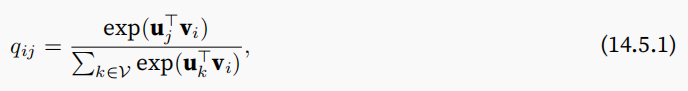

其中，对于任意索引i，向量vi和ui分别表⽰词wi作为中⼼词和上下⽂词，且V = {0, 1, . . . , |V| − 1}是词表的
索引集。

考虑词wi可能在语料库中出现多次。在整个语料库中，所有以wi为中⼼词的上下⽂词形成⼀个词索引的多重
集Ci，该索引允许同⼀元素的多个实例。对于任何元素，其实例数称为其重数。举例说明，假设词wi在语料
库中出现两次，并且在两个上下⽂窗⼝中以wi为其中⼼词的上下⽂词索引是k, j, m, k和k, l, k, j。因此，多重
集Ci = {j, j, k, k, k, k, l, m}，其中元素j, k, l, m的重数分别为2、4、1、1。

现在，让我们将多重集Ci中的元素j的重数表⽰为xij。这是词wj（作为上下⽂词）和词wi（作为中⼼词）在整
个语料库的同⼀上下⽂窗⼝中的全局共现计数。使⽤这样的全局语料库统计，跳元模型的损失函数等价于：

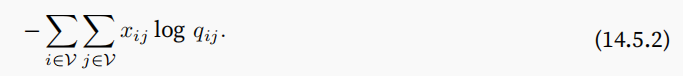

我们⽤xi表⽰上下⽂窗⼝中的所有上下⽂词的数量，其中wi作为它们的中⼼词出现，这相当于|Ci
|。设pij为⽤于⽣成上下⽂词wj的条件概率xij/xi。给定中⼼词wi，(14.5.2)可以重写为：

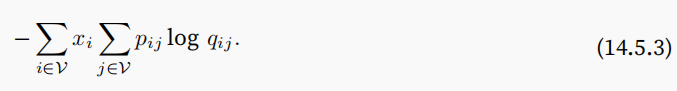

在 (14.5.3)中，−∑j∈V pij log qij计算全局语料统计的条件分布pij和模型预测的条件分布qij的交叉熵。如上
所述，这⼀损失也按xi加权。在 (14.5.3)中最⼩化损失函数将使预测的条件分布接近全局语料库统计中的条件
分布。

虽然交叉熵损失函数通常⽤于测量概率分布之间的距离，但在这⾥可能不是⼀个好的选择。⼀⽅⾯，正如我
们在 14.2节中提到的，规范化qij的代价在于整个词表的求和，这在计算上可能⾮常昂贵。另⼀⽅⾯，来⾃⼤
型语料库的⼤量罕⻅事件往往被交叉熵损失建模，从⽽赋予过多的权重。

### GloVe模型
有鉴于此，GloVe模型基于平⽅损失 (Pennington et al., 2014)对跳元模型做了三个修改：
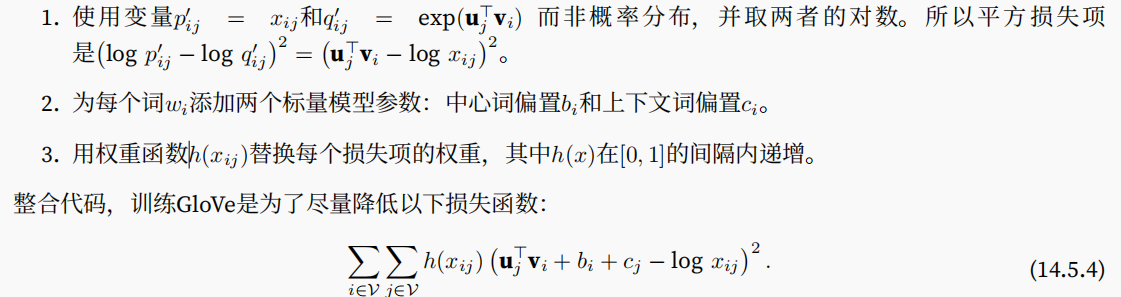

对于权重函数，建议的选择是：当x < c（例如，c = 100）时，h(x) = (x/c)
α（例如α = 0.75）；否则h(x) = 1。
在这种情况下，由于h(0) = 0，为了提⾼计算效率，可以省略任意xij = 0的平⽅损失项。例如，当使⽤⼩批量
随机梯度下降进⾏训练时，在每次迭代中，我们随机抽样⼀⼩批量⾮零的xij来计算梯度并更新模型参数。注
意，这些⾮零的xij是预先计算的全局语料库统计数据；因此，该模型GloVe被称为全局向量。

应该强调的是，当词wi出现在词wj的上下⽂窗⼝时，词wj也出现在词wi的上下⽂窗⼝。因此，xij = xji。与
拟合⾮对称条件概率pij的word2vec不同，GloVe拟合对称概率log xij。因此，在GloVe模型中，任意词的中⼼
词向量和上下⽂词向量在数学上是等价的。但在实际应⽤中，由于初始值不同，同⼀个词经过训练后，在这
两个向量中可能得到不同的值：GloVe将它们相加作为输出向量。

### 从条件概率比值理解GloVe模型
我们也可以从另⼀个⻆度来理解GloVe模型。使⽤ 14.5.1节中的相同符号，设pij
def = P(wj | wi)为⽣成上下⽂词wj的条件概率，给定wi作为语料库中的中⼼词。14.5.3节根据⼤量语料库的统计数据，列出了给定单词
“ice”和“steam”的共现概率及其⽐值。

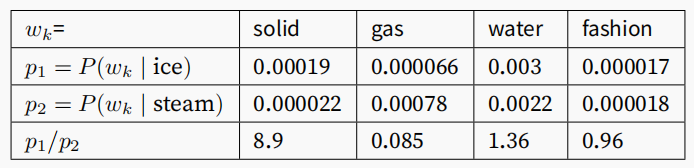

Table: ⼤型语料库中的词-词共现概率及其⽐值（根据 (Pennington et al., 2014)中的表1改编）
从 14.5.3节中，我们可以观察到以下⼏点：
* 对于与“ice”相关但与“steam”⽆关的单词wk，例如wk = solid，我们预计会有更⼤的共现概率⽐值，例如8.9。
* 对于与“steam”相关但与“ice”⽆关的单词wk，例如wk = gas，我们预计较⼩的共现概率⽐值，例如0.085。
* 对于同时与“ice”和“steam”相关的单词wk，例如wk = water，我们预计其共现概率的⽐值接近1，例如1.36.
* 对于与“ice”和“steam”都不相关的单词wk，例如wk = fashion，我们预计共现概率的⽐值接近1，例如0.96.

由此可⻅，共现概率的⽐值能够直观地表达词与词之间的关系。因此，我们可以设计三个词向量的函数来拟
合这个⽐值。对于共现概率pij/pik的⽐值，其中wi是中⼼词，wj和wk是上下⽂词，我们希望使⽤某个函数f来
拟合该⽐值：

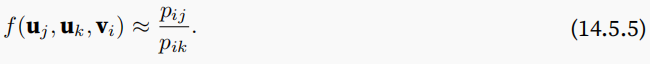

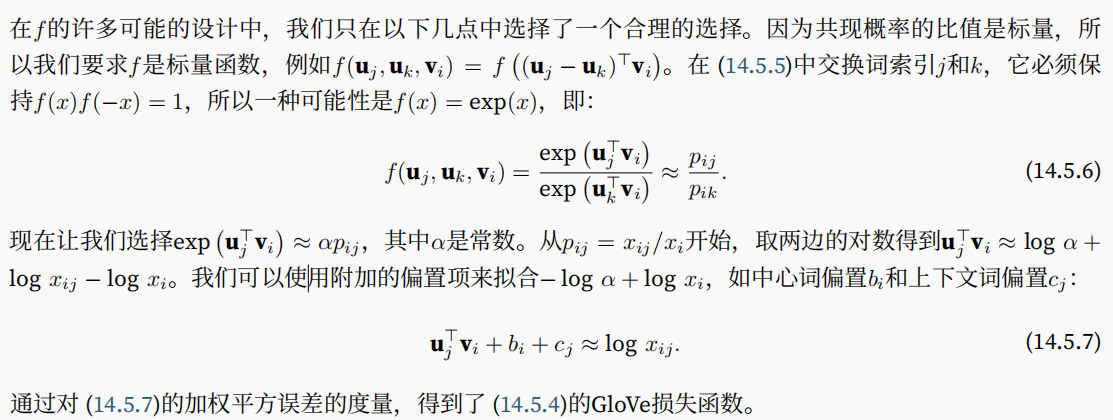

## 小结
* 诸如词-词共现计数的全局语料库统计可以来解释跳元模型。
* 交叉熵损失可能不是衡量两种概率分布差异的好选择，特别是对于⼤型语料库。GloVe使⽤平⽅损失来拟合预先计算的全局语料库统计数据。
* 对于GloVe中的任意词，中⼼词向量和上下⽂词向量在数学上是等价的。
* GloVe可以从词-词共现概率的⽐率来解释。